In [21]:
from data_loader import *
import numpy as np
import pandas as pd
import h5py
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import pyplot

In [22]:
id_and_bpm1 = np.array(pd.read_csv("bpms_database\ACM_MIRUM.csv"))
id_and_bpm2 = np.array(pd.read_csv("bpms_database\HAINSWORTH.csv"))
id_and_bpm3 = np.array(pd.read_csv("bpms_database\SMC_MIRUM.csv"))
id_and_bpm4 = np.array(pd.read_csv("bpms_database\GTZAN_GENRES.csv"))
id_and_bpm5 = np.array(pd.read_csv("bpms_database\EBALL.csv"))
id_and_bpm6 = np.array(pd.read_csv("bpms_database\MTG.csv"))
id_and_bpm7 = np.array(pd.read_csv("bpms_database\GIANTSTEPS.csv"))
id_and_bpm8 = np.array(pd.read_csv("bpms_database\LMD.csv"))
id_and_bpm9 = np.array(pd.read_csv("bpms_database\ISMIR2004.csv"))



print("O dataset ACM_MIRUM tem", id_and_bpm1.shape[0],"exemplos de treinamento")
print("O dataset HAINSWORTH tem",id_and_bpm2.shape[0],"exemplos de treinamento")
print("O dataset SMC_MIRUM tem",id_and_bpm3.shape[0],"exemplos de treinamento")
print("O dataset GTZAN_GENRES tem",id_and_bpm4.shape[0],"exemplos de treinamento")
print("O dataset EBALL tem",id_and_bpm5.shape[0],"exemplos de treinamento")
print("O dataset MTG tem",1170,"exemplos de treinamento")
print("O dataset GIANSTEPS tem",id_and_bpm7.shape[0],"exemplos de treinamento")
print("O dataset LMD tem",id_and_bpm8.shape[0]-1,"exemplos de treinamento")
print("O dataset EXTENDED_BALLROOM tem",4180,"exemplos de treinamento")
print("O dataset ISMIR2004 tem",id_and_bpm9.shape[0],"exemplos de treinamento")


O dataset ACM_MIRUM tem 1410 exemplos de treinamento
O dataset HAINSWORTH tem 221 exemplos de treinamento
O dataset SMC_MIRUM tem 217 exemplos de treinamento
O dataset GTZAN_GENRES tem 999 exemplos de treinamento
O dataset EBALL tem 3826 exemplos de treinamento
O dataset MTG tem 1170 exemplos de treinamento
O dataset GIANSTEPS tem 661 exemplos de treinamento
O dataset LMD tem 3605 exemplos de treinamento
O dataset EXTENDED_BALLROOM tem 4180 exemplos de treinamento
O dataset ISMIR2004 tem 465 exemplos de treinamento


In [23]:
print("ESCOLHER DATABASE PARA PRÉ-PROCESSAMENTO")
print("Opções de escolha:")
print("1 = ACM_MIRUM")
print("2 = HAINSWORTH")
print("3 = SMC_MIRUM")
print("4 = GTZAN_GENRES")
print("5 = EBALL")
print("6 = MTG")
print("7 = GIANTSTEPS")
print("8 = LMD")
print("9 = EXTENDEND_BALLROOM")
print("10 = ISMIR2004")


database=int(input('Qual Dataset será usado?'))
if database==1:
    filename = 'acm_mirum'
    nb_files = id_and_bpm1.shape[0] 
elif database==2:
    filename = 'hainsworth'
    nb_files = id_and_bpm2.shape[0]
elif database==3:
    filename = 'smc_mirum'
    nb_files = id_and_bpm3.shape[0]
elif database==4:
    filename = 'gtzan'
    nb_files = id_and_bpm4.shape[0]
elif database==5:
    filename= 'eball'
    nb_files = id_and_bpm5.shape[0]
elif database==6:
    filename= 'mtg'
    nb_files = 1170 #não foram todos importados 
elif database==7:
    filename= 'giantsteps'
    nb_files = id_and_bpm7.shape[0]
elif database==8:
    filename= 'lmd'
    nb_files = id_and_bpm8.shape[0] - 1 
elif database==9:
    filename= 'extended_ballroom'
    nb_files = 4180
elif database==10:
    filename= 'ismir2004'
    nb_files = id_and_bpm9.shape[0]
print("Você escolheu o Database=", filename)

ESCOLHER DATABASE PARA PRÉ-PROCESSAMENTO
Opções de escolha:
1 = ACM_MIRUM
2 = HAINSWORTH
3 = SMC_MIRUM
4 = GTZAN_GENRES
5 = EBALL
6 = MTG
7 = GIANTSTEPS
8 = LMD
9 = EXTENDEND_BALLROOM
10 = ISMIR2004


Qual Dataset será usado? 8


Você escolheu o Database= lmd


In [24]:
whole_data = []

# loop from 0 to the number of .hdf5 files you want to load

for i in range(0,nb_files):
    # Selects the file
    file_to_load = 'h5/n2data_' + str(filename) + '_' + str(i) + '.hdf5'
    
    # Gets data
    data = data_loader(file_to_load)
    whole_data.append(data)
    if i%100 == 0:
            print(f"We've already made {i} importation.")

    
print(len(whole_data))

We've already made 0 importation.
We've already made 100 importation.
We've already made 200 importation.
We've already made 300 importation.
We've already made 400 importation.
We've already made 500 importation.
We've already made 600 importation.
We've already made 700 importation.
We've already made 800 importation.
We've already made 900 importation.
We've already made 1000 importation.
We've already made 1100 importation.
We've already made 1200 importation.
We've already made 1300 importation.
We've already made 1400 importation.
We've already made 1500 importation.
We've already made 1600 importation.
We've already made 1700 importation.
We've already made 1800 importation.
We've already made 1900 importation.
We've already made 2000 importation.
We've already made 2100 importation.
We've already made 2200 importation.
We've already made 2300 importation.
We've already made 2400 importation.
We've already made 2500 importation.
We've already made 2600 importation.
We've already

In [25]:
# LIST -> Dictionary(Data) -> Features(numpy.ndarray)
# m -> the m-th example
# feature -> ODF_SET, PeDF_FULL_SET, PeDF_PARTIAL_SET, coeffs
# wavelet_level -> wavelet level
# whole_data[m][feature][wavelet_level]

print(type(whole_data[0]['ODF_SET'][0]))

print(f"O database possui {len(whole_data)} exemplos de treinamento.")
print(f"O nível Wavelet A2 tem {len(whole_data[0]['PeDF_PARTIAL_SET'][0])} amostras.")
print(f"O nível Wavelet D2 tem {len(whole_data[0]['PeDF_PARTIAL_SET'][1])} amostras.")
print(f"O nível Wavelet D1 tem {len(whole_data[0]['PeDF_PARTIAL_SET'][2])} amostras.")


print(whole_data[0]['bpm'])

<class 'numpy.ndarray'>
O database possui 3605 exemplos de treinamento.
O nível Wavelet A2 tem 149 amostras.
O nível Wavelet D2 tem 149 amostras.
O nível Wavelet D1 tem 298 amostras.
129.99567


In [26]:
# CRIANDO VETOR PRÓPRIO Y
y = []
yy = []
for j in range(0,len(whole_data)): 
    yy.append(whole_data[j]['bpm'])

    
yy = np.array(yy, dtype=np.float).reshape(len(whole_data),1)
print(type(yy))
for j in range(0,len(whole_data)): 
    y.append(round(yy[j][0]))
    
y = np.array(y, dtype=np.float).reshape(len(whole_data),1)
print(f"O valor máximo de andamento é {np.max(y)}.")
print(f"O valor mínimo de andamento é {np.min(y)}.")

print(y[0:10])

<class 'numpy.ndarray'>
O valor máximo de andamento é 161.0.
O valor mínimo de andamento é 44.0.
[[130.]
 [129.]
 [145.]
 [116.]
 [128.]
 [ 82.]
 [128.]
 [126.]
 [128.]
 [110.]]


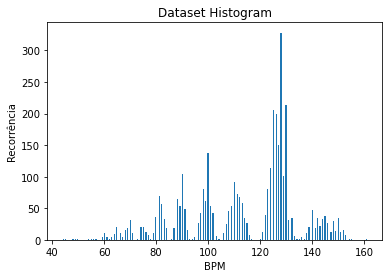

In [27]:
plt.hist(y,bins=250)
plt.title("Dataset Histogram")
plt.xlabel("BPM")
plt.ylabel("Recorrência")
plt.show()

In [28]:
aux2 = y.tolist()
print("-")
def remove_repetidos(lista):
    l = []
    laux = []
    a=0
    for i in lista:
        a=a+1
        if i not in l:
            l.append(i)
            laux.append(a)
    l.sort()
    return l, laux

classes_sort, posicao = remove_repetidos(aux2)

print(classes_sort)
aux2=sorted(aux2)
print("-")
rcr = []
recorrencia = []
laux = []
l = []
a=0
for i in aux2:
    rcr.append(aux2.count(i))
    a=a+1
    if i not in l:
        l.append(i)
        laux.append(a)

for i in laux:
    recorrencia.append(rcr[i-1])

print(laux)
print("-")
print(posicao)

print("-")
print(recorrencia)
print(sum(recorrencia))


-
[[44.0], [45.0], [48.0], [49.0], [50.0], [54.0], [55.0], [56.0], [57.0], [59.0], [60.0], [61.0], [62.0], [63.0], [64.0], [65.0], [66.0], [67.0], [68.0], [69.0], [70.0], [71.0], [73.0], [74.0], [75.0], [76.0], [77.0], [78.0], [79.0], [80.0], [81.0], [82.0], [83.0], [84.0], [86.0], [87.0], [88.0], [89.0], [90.0], [91.0], [92.0], [93.0], [94.0], [95.0], [96.0], [97.0], [98.0], [99.0], [100.0], [101.0], [102.0], [103.0], [104.0], [106.0], [107.0], [108.0], [109.0], [110.0], [111.0], [112.0], [113.0], [114.0], [115.0], [116.0], [117.0], [120.0], [121.0], [122.0], [123.0], [124.0], [125.0], [126.0], [127.0], [128.0], [129.0], [130.0], [131.0], [132.0], [133.0], [134.0], [135.0], [136.0], [137.0], [138.0], [139.0], [140.0], [141.0], [142.0], [143.0], [144.0], [145.0], [146.0], [147.0], [148.0], [149.0], [150.0], [151.0], [152.0], [153.0], [154.0], [155.0], [161.0]]
-
[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 15, 25, 29, 30, 34, 43, 64, 74, 78, 94, 113, 144, 155, 157, 177, 198, 211, 219, 221, 231, 26

In [29]:
list=[] #Classes de 20 até 269
list2=[] #OneHOT enconder
list3=[] #lista para Y
for i in range(0,250): list.append(i+20),list2.append(0)
for j in range(0,nb_files):
    for i in range(0,250):
        if y[j]==list[i]:
            list2[i]=1
    list3.append(list2)
    list2=[]
    for i in range(0,250): list2.append(0)

        

Y=np.array(list3).reshape(nb_files,250)
print(Y.shape)
print(Y[0:10])



(3605, 250)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


1.0
306
(17, 18, 3)


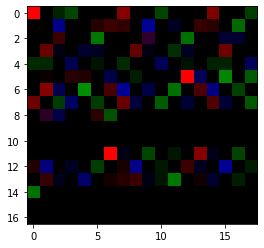

In [30]:
print(whole_data[0]['PeDF_PARTIAL_SET'][2][0])
lista = []

for j in range(0,len(whole_data)):  #varrer m-exemplos

    listaux0 = []    #D1
    listaux1 = []    #D2
    listaux2 = []    #A2
    listaux0.append(1)
    listaux1.append(1)    
    listaux2.append(1)  
    for i in range(1,len(whole_data[0]['PeDF_PARTIAL_SET'][2])):
        if (i<len(whole_data[j]['PeDF_PARTIAL_SET'][2])-1):
            if (whole_data[j]['PeDF_PARTIAL_SET'][2][i]>whole_data[j]['PeDF_PARTIAL_SET'][2][i-1] and whole_data[j]['PeDF_PARTIAL_SET'][2][i]>whole_data[j]['PeDF_PARTIAL_SET'][2][i+1]):
                listaux0.append(whole_data[j]['PeDF_PARTIAL_SET'][2][i])
            else:
                listaux0.append(0)
        else: 
            listaux0.append(0)

    for i in range(1,len(whole_data[0]['PeDF_PARTIAL_SET'][1])):
        if (i<len(whole_data[0]['PeDF_PARTIAL_SET'][1])-1):
            if (whole_data[j]['PeDF_PARTIAL_SET'][1][i]>whole_data[j]['PeDF_PARTIAL_SET'][1][i-1] and whole_data[j]['PeDF_PARTIAL_SET'][1][i]>whole_data[j]['PeDF_PARTIAL_SET'][1][i+1]):
                listaux1.append(whole_data[j]['PeDF_PARTIAL_SET'][1][i])
            else:
                listaux1.append(0)
        else: 
            listaux1.append(0)
        if (i<len(whole_data[0]['PeDF_PARTIAL_SET'][0])-1):
            if (whole_data[j]['PeDF_PARTIAL_SET'][0][i]>whole_data[j]['PeDF_PARTIAL_SET'][0][i-1] and whole_data[j]['PeDF_PARTIAL_SET'][0][i]>whole_data[j]['PeDF_PARTIAL_SET'][0][i+1]):
                listaux2.append(whole_data[j]['PeDF_PARTIAL_SET'][2][i])
            else:
                listaux2.append(0)
        else: 
            listaux2.append(0)
    #print(j)
            
#Setar shape 298, 149, 149 17x18 = 306 
    if filename=="ismir2004":
        for i in range(0,8+95):
            listaux0.append(0)
        for i in range(0,8+149+47):
            listaux1.append(0)
            listaux2.append(0)
    else:
        for i in range(0,8):
            listaux0.append(0)
        for i in range(0,8+149):
            listaux1.append(0)
            listaux2.append(0)

#
    lista.append([listaux0, listaux1, listaux2]) #len = 3*306*4180 - 3837240 dados
#print(lista[2])
print(len(listaux0))

#lista = np.array(lista).reshape(len(whole_data),3,17,18) #(4180,3,17,18)
lista = np.array(lista).reshape(len(whole_data),17,18,3) #(4180,17,18,3)


# exemplos --> nível wavelet --> imagem (17x18)
listaux0 = np.array(listaux0).reshape(17,18)
listaux1 = np.array(listaux1).reshape(17,18)
listaux2 = np.array(listaux2).reshape(17,18)

print(lista[1].shape)
#imagem

imgplot = plt.imshow(lista[2])

Text(0.5, 1.0, 'Image PeDF 3')

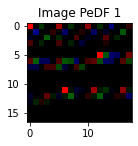

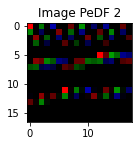

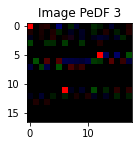

In [15]:
fig = plt.figure()
a = fig.add_subplot(2, 2, 1)
imgplot = plt.imshow(lista[0])
a.set_title('Image PeDF 1')
fig = plt.figure()
a = fig.add_subplot(2, 2, 2)
imgplot = plt.imshow(lista[2])
a.set_title('Image PeDF 2')
fig = plt.figure()
a = fig.add_subplot(2, 2, 3)
imgplot = plt.imshow(lista[3])
a.set_title('Image PeDF 3')

In [16]:
if filename=='mtg' or filename=='eball' or filename=='extended_ballroom' or filename=='lmd' or filename=="gtzan":
    np.random.seed(0)
    np.random.shuffle(lista)
    np.random.seed(0)
    np.random.shuffle(Y)

    total_size = lista.shape[0]
    train_size = int((total_size)*0.90)
    val_size = (train_size)
    X_train = lista[0:train_size,:,:,:]
    Y_train = Y[0:train_size,:]
    X_val = lista[val_size:total_size,:,:,:]
    Y_val = Y[val_size:total_size,:]

    print('Lista Size',lista.shape)
    print('Y Size', Y.shape)
    print('X_train Size',X_train.shape)
    print('Y_train Size',Y_train.shape)
    print('X_val Size',X_val.shape)
    print('Y_val Size',Y_val.shape)
else:
    X_test = lista
    Y_test = Y
    print('X_test Size',X_test.shape)
    print('Y_test Size',Y_test.shape)

X_test Size (465, 17, 18, 3)
Y_test Size (465, 250)


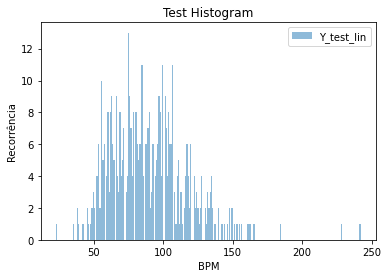

In [17]:
bins=Y.shape[1]
limclass=np.array(classes_sort).T.shape[1]
#===ONE HOT TO LIN===#
if filename=='mtg' or filename=='eball' or filename=='extended_ballroom' or filename=='lmd' or filename=="gtzan":
    #===TRAIN===#
    Y_train_ = []
    Y_train_lin = []

    for cont in range(0,Y_train.shape[0]):
        a = 0
        i = 0
        for a in range(0,Y_train.shape[1]):
            i = Y_train[cont][a]
            if (i==1):
                Y_train_.append(a)
            a += 1
    for i in range(0,Y_train.shape[0]):
        for j in range(0,limclass):
            if Y_train_[i]+20==classes_sort[j][0]:
                Y_train_lin.append(classes_sort[j][0])
    #print(np.array(Y_train_lin))


    #===VAL===#
    Y_val_ = []
    Y_val_lin = []

    for cont in range(0,Y_val.shape[0]):
        a = 0
        i = 0
        for a in range(0,Y_val.shape[1]):
            i = Y_val[cont][a]
            if (i==1):
                Y_val_.append(a)
            a += 1
    for i in range(0,Y_val.shape[0]):
        for j in range(0,limclass):
            if Y_val_[i]+20==classes_sort[j][0]:
                Y_val_lin.append(classes_sort[j][0])
    #print(np.array(Y_val_lin))
    
    pyplot.hist(Y_train_lin, bins, alpha=0.5, label='Y_train_lin')
    pyplot.hist(Y_val_lin, bins, alpha=0.5, label='Y_val_lin')
    pyplot.title("Train|Val| Histogram")
    pyplot.legend(loc='upper right')
    pyplot.xlabel("BPM")
    pyplot.ylabel("Recorrência")
    pyplot.show()


else:
    #===TEST===#
    Y_test_ = []
    Y_test_lin = []

    for cont in range(0,Y_test.shape[0]):
        a = 0
        i = 0
        for a in range(0,Y_test.shape[1]):
            i = Y_test[cont][a]
            if (i==1):
                Y_test_.append(a)
            a += 1
    for i in range(0,Y_test.shape[0]):
        for j in range(0,limclass):
            if Y_test_[i]+20==classes_sort[j][0]:
                Y_test_lin.append(classes_sort[j][0])
    #print(np.array(Y_test_lin))
    pyplot.hist(Y_test_lin, bins, alpha=0.5, label='Y_test_lin')
    pyplot.title("Test Histogram")
    pyplot.legend(loc='upper right')
    pyplot.xlabel("BPM")
    pyplot.ylabel("Recorrência")
    pyplot.show()




In [18]:
if filename=='mtg' or filename=='eball' or filename=='extended_ballroom' or filename=='lmd' or filename=="gtzan":
    plt.hist(Y_train_lin,bins)
    plt.title("Train Histogram")
    plt.xlabel("BPM")
    plt.ylabel("Recorrência")
    plt.show()

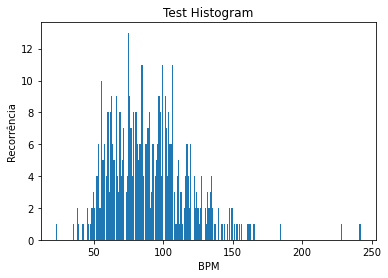

In [19]:
if filename=='mtg' or filename=='eball' or filename=='extended_ballroom' or filename=='lmd' or filename=="gtzan":
    plt.hist(Y_val_lin,bins)
    plt.title("Validation Histogram")
    plt.xlabel("BPM")
    plt.ylabel("Recorrência")
    plt.show()
else:
    plt.hist(Y_test_lin,bins)
    plt.title("Test Histogram")
    plt.xlabel("BPM")
    plt.ylabel("Recorrência")
    plt.show()

In [20]:
hf = h5py.File('h5/Data_' + str(filename) + '.hdf5','a')

if filename=='mtg' or filename=='eball' or filename=='extended_ballroom' or filename=='lmd' or filename=="gtzan":
    Xtrain = hf.create_group('Xtrain')
    Ytrain = hf.create_group('Ytrain')
    Xval = hf.create_group('Xval')
    Yval = hf.create_group('Yval')
    Classessort = hf.create_group('Classessort')
    Rcr = hf.create_group('Rcr')
else:
    Xtest = hf.create_group('Xtest')
    Ytest = hf.create_group('Ytest')
    Classessort = hf.create_group('Classessort')
    Rcr = hf.create_group('Rcr')

if filename=='mtg' or filename=='eball' or filename=='extended_ballroom' or filename=='lmd' or filename=="gtzan":
    Xtrain.create_dataset("Xtrain", data=X_train)
    Ytrain.create_dataset("Ytrain", data=Y_train)
    Xval.create_dataset("Xval", data=X_val)
    Yval.create_dataset("Yval", data=Y_val)
    Classessort.create_dataset("Classessort", data=classes_sort)
    Rcr.create_dataset("Rcr", data=recorrencia)
else:
    Xtest.create_dataset("Xtest", data=X_test)
    Ytest.create_dataset("Ytest", data=Y_test)
    Classessort.create_dataset("Classessort", data=classes_sort)
    Rcr.create_dataset("Rcr", data=recorrencia)

hf.close()
